# *Libraries*

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from IPython.display import clear_output
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader

clear_output()

In [3]:
NO_CAT = 2
LIST_NO_TOPIC = [0,1,2,3,4,5,6,9]

ID2LABEL_1 = {
    0 : 'positif',
    1 : 'netral',
    2 : 'negatif'
}

ID2LABEL_2 = {
     2 :'positif',
     1 :'netral',
     0 :'negatif'
}

SOURCE_1 = 'w11wo/indonesian-roberta-base-sentiment-classifier'
SOURCE_2 = 'mdhugol/indonesia-bert-sentiment-classification'
SOURCE_3 = 'ridhodaffasyah/sentiment-analysis-indobertweet'

# *Prepare Dataframe*

In [4]:
BASE_DIR = '/kaggle/input/classify-president-topic-satria-data-sf'

if NO_CAT == 1:
    DIR_1 = f"{BASE_DIR}/classify_president_cat_1_topic_p1/classify_president_cat_1_topic.csv"
    DIR_2 = f"{BASE_DIR}/classify_president_cat_1_topic_p2/classify_president_cat_1_topic.csv"
else:
    DIR = f"{BASE_DIR}/classify_president_cat_{NO_CAT}_topic/classify_president_cat_{NO_CAT}_topic.csv"

In [5]:
if NO_CAT == 1:
    df_1 = pd.read_csv(DIR_1)
    df_2 = pd.read_csv(DIR_2)
    df = pd.concat([df_1,df_2]).reset_index(drop=True)
else:
    df = pd.read_csv(DIR)

In [6]:
def clean_tweet(tweet):
    # Hapus hashtag
    tweet = re.sub(r"#\w+", "", tweet)
    # Hapus karakter newline
    tweet = tweet.replace('\n', ' ')
    # Hapus spasi berlebih yang mungkin tersisa
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    # Hapus tanda re
    tweet = re.sub(r'\[re[^\]]*\]', '', tweet)
   
    return tweet.strip()

In [7]:
df = df[['content','topic']]

In [8]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [9]:
df['content'] = df['content'].apply(clean_tweet)

In [10]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [11]:
tweets = df['content']
print(f"Jumlah tweet yang ada : {len(tweets)}")

Jumlah tweet yang ada : 540265


# *Prepare Dataset*

In [12]:
class TextDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self,idx):
        text = self.texts[idx]
        return text

In [13]:
datasets = TextDataset(tweets)
data_loader = DataLoader(datasets, batch_size=32, shuffle=True)

# *Predict Function*

In [14]:
def predict_batch(batch_texts,tokenizer,model):
    encoded_inputs = tokenizer(batch_texts, truncation=True, padding=True, max_length=512, return_tensors="pt")
    encoded_inputs = {key: val.to(device) for key, val in encoded_inputs.items()}
    
    with torch.no_grad():
        outputs = model(**encoded_inputs)
    
    predictions = outputs.logits.argmax(dim=-1).cpu()
    return predictions.numpy()


# *Predict Sentiment - Model 1*

In [15]:
tokenizer = AutoTokenizer.from_pretrained(SOURCE_1)
model = AutoModelForSequenceClassification.from_pretrained(SOURCE_1)

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [16]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = model.to(device)
print("Device : " + str(device))

Device : cuda


In [17]:
all_prediction = []
for batch_texts in data_loader:
    predictions = predict_batch(batch_texts,tokenizer,model)
    all_prediction.extend(predictions)

In [18]:
df['sentimen_1'] = [ID2LABEL_1[pred] for pred in all_prediction]

# *Predict Sentiment - Model 2*

In [19]:
tokenizer = AutoTokenizer.from_pretrained(SOURCE_2)
model = AutoModelForSequenceClassification.from_pretrained(SOURCE_2)

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [20]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = model.to(device)
print("Device : " + str(device))

Device : cuda


In [21]:
all_prediction = []
for batch_texts in data_loader:
    predictions = predict_batch(batch_texts,tokenizer,model)
    all_prediction.extend(predictions)

In [22]:
df['sentimen_2'] = [ID2LABEL_1[pred] for pred in all_prediction]

# *Predict Sentiment - Model 3*

In [23]:
tokenizer = AutoTokenizer.from_pretrained(SOURCE_3)
model = AutoModelForSequenceClassification.from_pretrained(SOURCE_3)

tokenizer_config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/235k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/738k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/963 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

In [24]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = model.to(device)
print("Device : " + str(device))

Device : cuda


In [25]:
all_prediction = []
for batch_texts in data_loader:
    predictions = predict_batch(batch_texts,tokenizer,model)
    all_prediction.extend(predictions)

In [26]:
df['sentimen_3'] = [ID2LABEL_2[pred] for pred in all_prediction]

# *Save Prediction*

In [27]:
df.to_csv(f'sentiment-category-{NO_CAT}.csv', index=False)

In [28]:
def visualize_sentiment_result(df,no_topic):
    sentiment_counts_1 = df['sentimen_1'].value_counts().sort_index()
    sentiment_counts_2 = df['sentimen_2'].value_counts().sort_index()
    sentiment_counts_3 = df['sentimen_3'].value_counts().sort_index()

    sentiment_df = pd.DataFrame({
        'Indo-RoBERTa': sentiment_counts_1,
        'Indo-BERT': sentiment_counts_2,
        'Indo-BERTweet': sentiment_counts_3
    }).reset_index().rename(columns={'index': 'Sentiment'})
    sentiment_df = sentiment_df.melt(id_vars='Sentiment', var_name='Model', value_name='Count')

    plt.figure(figsize=(12, 6))
    sns.barplot(data=sentiment_df, x='Sentiment', y='Count', hue='Model')

    plt.title(f'Sentiment Distribution Across Models for Topic {no_topic}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.legend(title='Model')
    plt.show()

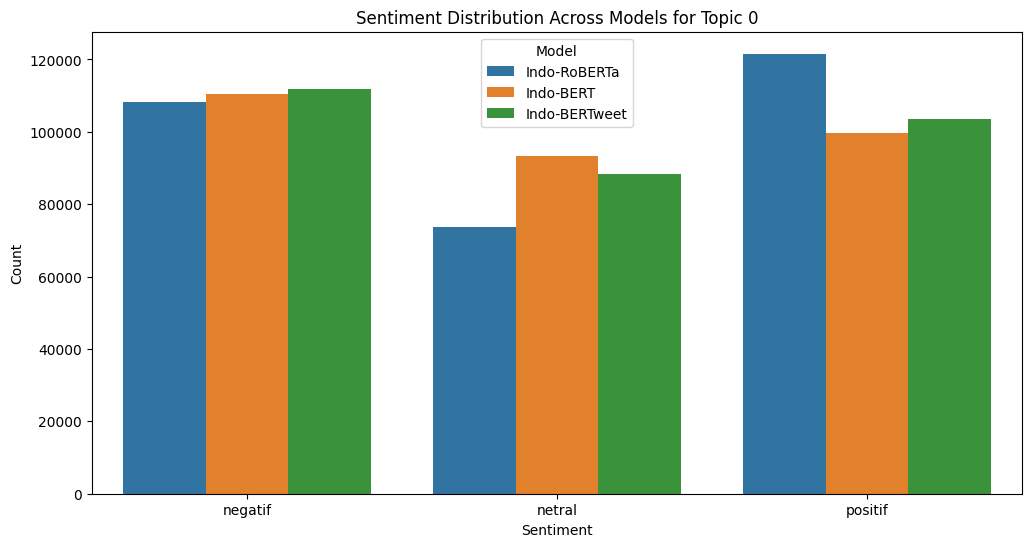

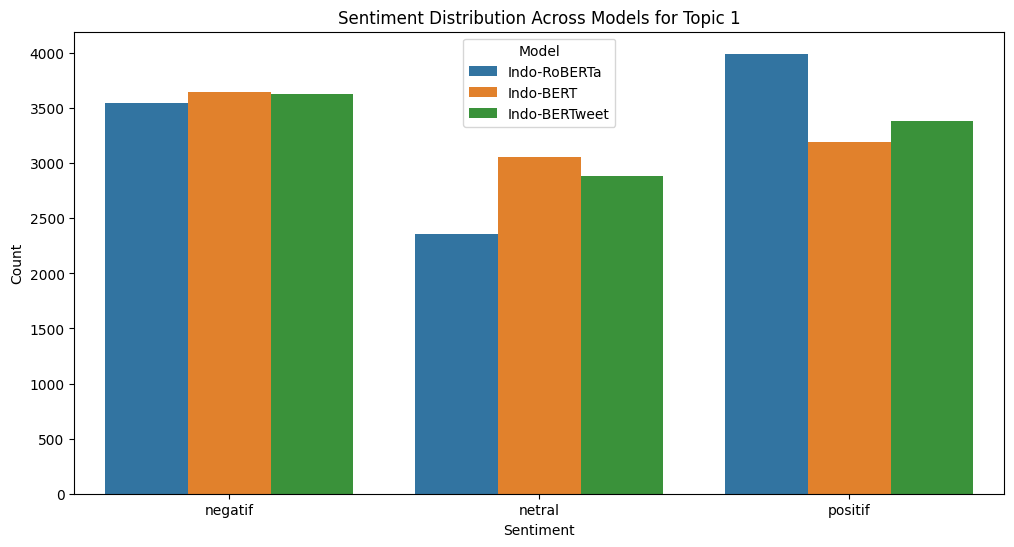

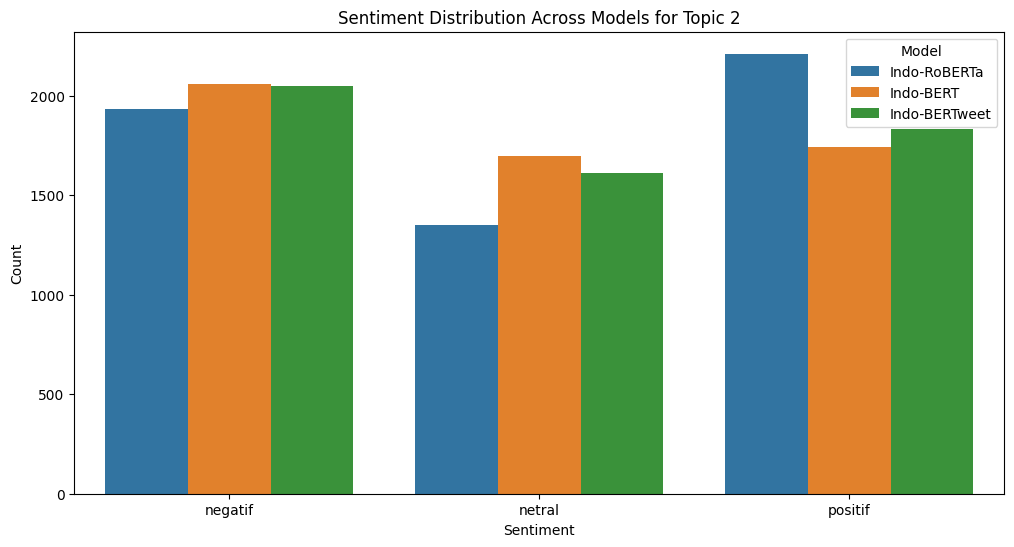

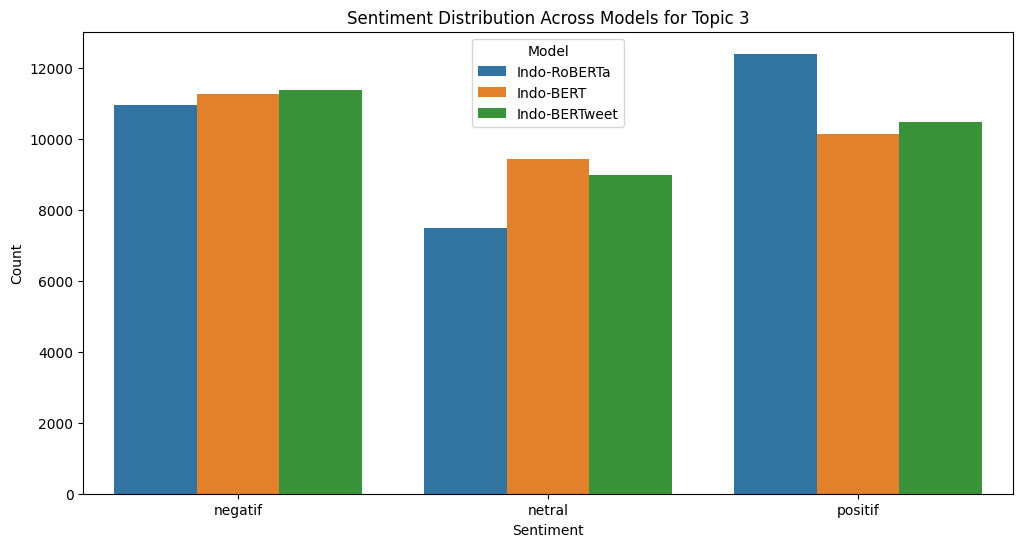

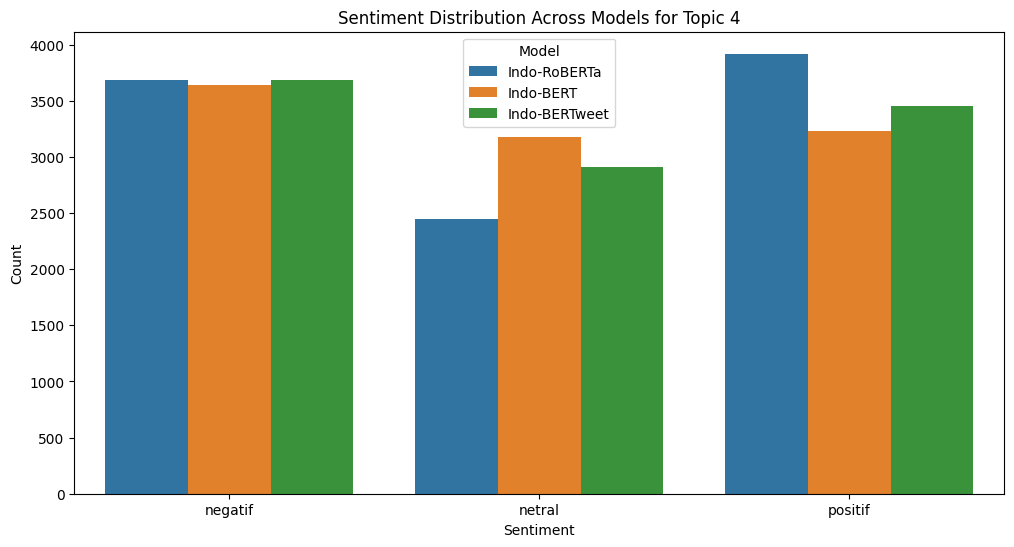

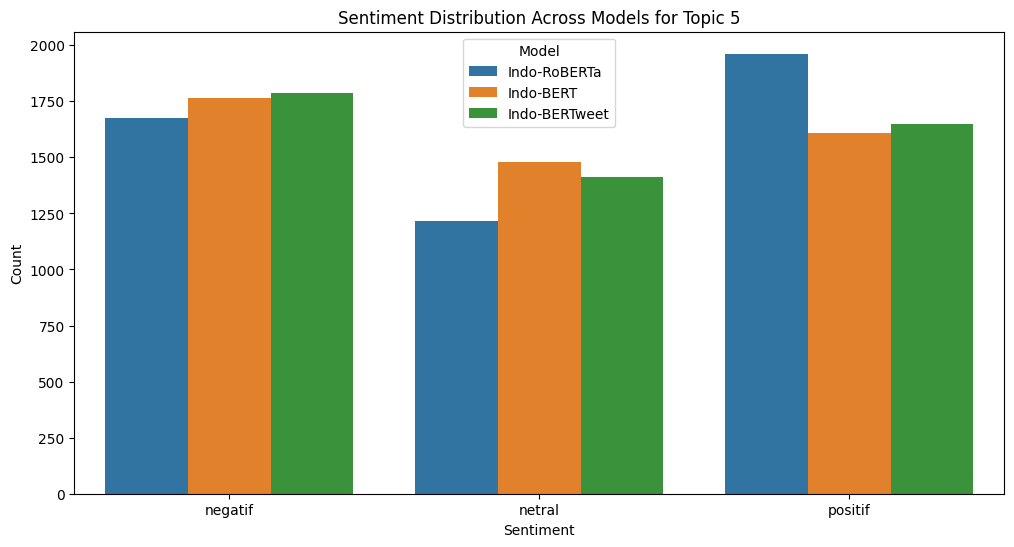

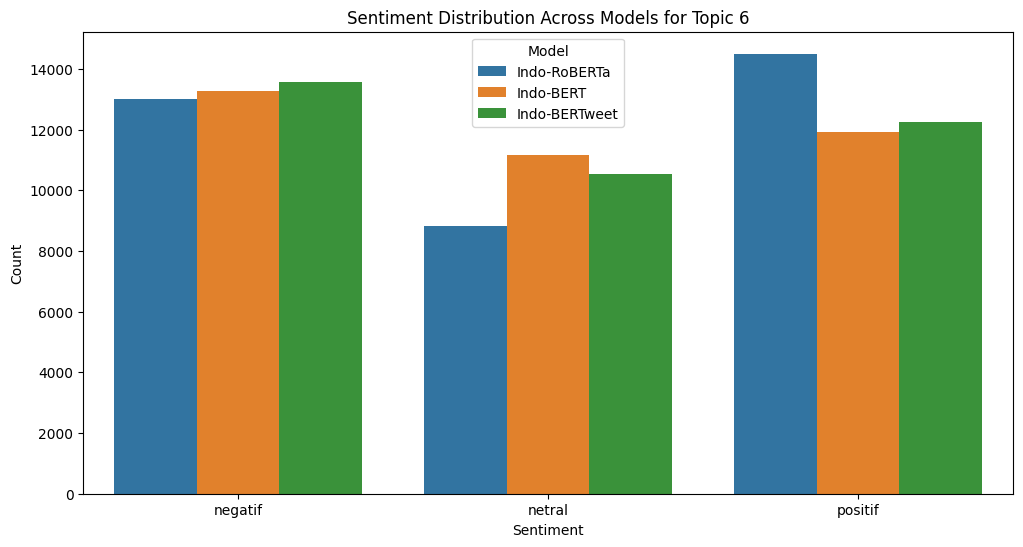

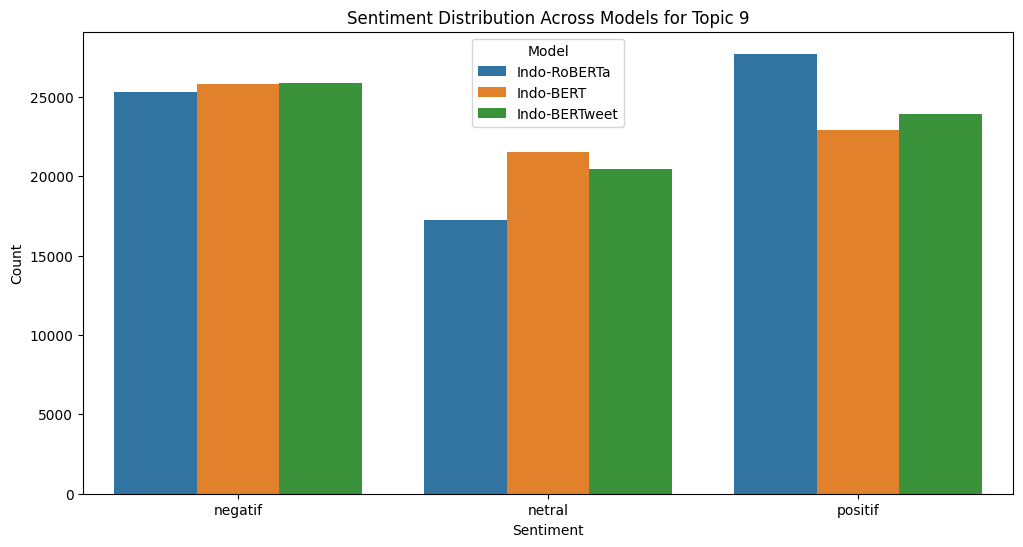

In [29]:
for no_topic in LIST_NO_TOPIC:
    visualize_sentiment_result(df[df['topic'] == no_topic],no_topic)